In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('DARWIN/DARWIN.csv')
df.head()

ID  air_time1  disp_index1  gmrt_in_air1  gmrt_on_paper1  \
0  id_1       5160     0.000013    120.804174       86.853334   
1  id_2      51980     0.000016    115.318238       83.448681   
2  id_3       2600     0.000010    229.933997      172.761858   
3  id_4       2130     0.000010    369.403342      183.193104   
4  id_5       2310     0.000007    257.997131      111.275889   

   max_x_extension1  max_y_extension1  mean_acc_in_air1  mean_acc_on_paper1  \
0               957              6601          0.361800            0.217459   
1              1694              6998          0.272513            0.144880   
2              2333              5802          0.387020            0.181342   
3              1756              8159          0.556879            0.164502   
4               987              4732          0.266077            0.145104   

   mean_gmrt1  ...  mean_jerk_in_air25  mean_jerk_on_paper25  \
0  103.828754  ...            0.141434              0.024471   
1   99.383459  ...            0.049663              0.018368   
2  201.347928  ...            0.178194              0.017174   
3  276.298223  ...            0.113905              0.019860   
4  184.636510  ...            0.121782              0.020872   

   mean_speed_in_air25  mean_speed_on_paper25  num_of_pendown25  paper_time25  \
0             5.596487               3.184589                71         40120   
1             1.665973               0.950249               129        126700   
2             4.000781               2.392521                74         45480   
3             4.206746               1.613522               123         67945   
4             3.319036               1.680629                92         37285   

   pressure_mean25  pressure_var25  total_time25  class  
0      1749.278166     296102.7676        144605      P  
1      1504.768272     278744.2850        298640      P  
2      1431.443492     144411.7055         79025      P  
3      1465.843329     230184.7154        181220      P  
4      1841.702561     158290.0255         72575      P  

[5 rows x 452 columns]

In [4]:
df.columns

Index(['ID', 'air_time1', 'disp_index1', 'gmrt_in_air1', 'gmrt_on_paper1',
       'max_x_extension1', 'max_y_extension1', 'mean_acc_in_air1',
       'mean_acc_on_paper1', 'mean_gmrt1',
       ...
       'mean_jerk_in_air25', 'mean_jerk_on_paper25', 'mean_speed_in_air25',
       'mean_speed_on_paper25', 'num_of_pendown25', 'paper_time25',
       'pressure_mean25', 'pressure_var25', 'total_time25', 'class'],
      dtype='object', length=452)

In [6]:
del df['ID']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 451 entries, air_time1 to class
dtypes: float64(300), int64(150), object(1)
memory usage: 613.2+ KB


In [8]:
df.isnull().sum()

air_time1           0
disp_index1         0
gmrt_in_air1        0
gmrt_on_paper1      0
max_x_extension1    0
                   ..
paper_time25        0
pressure_mean25     0
pressure_var25      0
total_time25        0
class               0
Length: 451, dtype: int64

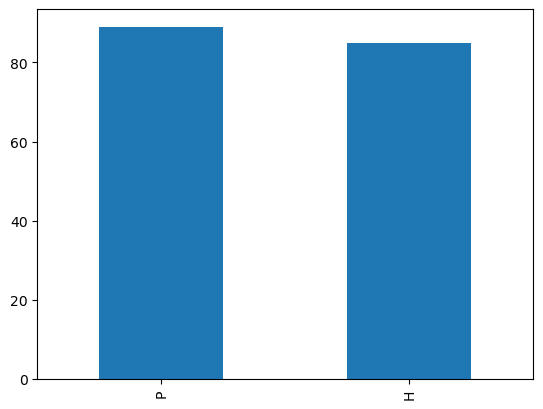

In [10]:
df['class'].value_counts().plot(kind='bar');

In [11]:
X = df.drop(["class"],axis =1)
y = df["class"]

# Anova FS

In [17]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

selector = SelectKBest(mutual_info_classif, k=20)
X_reduced = selector.fit_transform(X, y)
X_reduced.shape

(174, 20)

In [18]:
cols = selector.get_support(indices=True)
selected_columns = X.iloc[:,cols].columns.tolist()
selected_columns

['total_time9',
 'gmrt_on_paper10',
 'mean_speed_on_paper10',
 'paper_time11',
 'mean_gmrt14',
 'total_time15',
 'air_time17',
 'mean_jerk_in_air17',
 'total_time17',
 'air_time19',
 'max_x_extension19',
 'mean_speed_on_paper19',
 'num_of_pendown19',
 'pressure_mean19',
 'total_time19',
 'air_time22',
 'air_time23',
 'paper_time23',
 'total_time23',
 'total_time25']

In [19]:
df = df[['total_time9',
         'gmrt_on_paper10',
         'mean_speed_on_paper10',
         'paper_time11',
         'mean_gmrt14',
         'total_time15',
         'air_time17',
         'mean_jerk_in_air17',
         'total_time17',
         'air_time19',
         'max_x_extension19',
         'mean_speed_on_paper19',
         'num_of_pendown19',
         'pressure_mean19',
         'total_time19',
         'air_time22',
         'air_time23',
         'paper_time23',
         'total_time23',
         'total_time25','class']]
df.to_csv('anova_process.csv')

In [21]:
df = pd.read_csv('anova_process.csv')

In [22]:
del df['Unnamed: 0']

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   total_time9            174 non-null    int64  
 1   gmrt_on_paper10        174 non-null    float64
 2   mean_speed_on_paper10  174 non-null    float64
 3   paper_time11           174 non-null    int64  
 4   mean_gmrt14            174 non-null    float64
 5   total_time15           174 non-null    int64  
 6   air_time17             174 non-null    int64  
 7   mean_jerk_in_air17     174 non-null    float64
 8   total_time17           174 non-null    int64  
 9   air_time19             174 non-null    int64  
 10  max_x_extension19      174 non-null    int64  
 11  mean_speed_on_paper19  174 non-null    float64
 12  num_of_pendown19       174 non-null    int64  
 13  pressure_mean19        174 non-null    float64
 14  total_time19           174 non-null    int64  
 15  air_ti

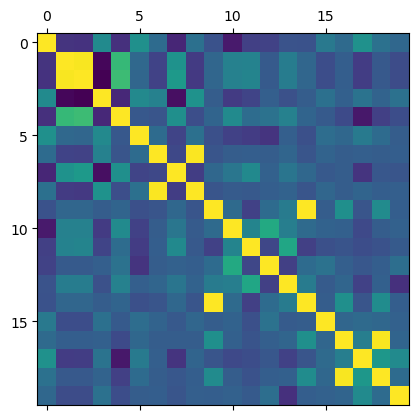

In [24]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()

In [25]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows 
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
df['class']= label_encoder.fit_transform(df['class']) 

df['class'].unique() 

array([1, 0])

In [26]:
X = df.drop(["class"],axis =1)
y = df["class"]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.20, random_state = 42)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((139, 20), (139,), (35, 20), (35,))

In [10]:
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score,roc_auc_score,cohen_kappa_score,matthews_corrcoef

In [11]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from  sklearn.model_selection import ShuffleSplit 

In [12]:
from numpy import mean
from numpy import std

In [15]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []
auc = []
coh = []
mcc = []


#function to call for storing the results
def storeResults(model, a,b,c,d,e,f,g):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))
    auc.append(round(e,3))
    coh.append(round(f,3))
    mcc.append(round(g,3))

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_valid)

rf_acc = accuracy_score(y_pred, y_valid)
rf_prec = precision_score(y_pred, y_valid,average='weighted')
rf_rec = recall_score(y_pred, y_valid,average='weighted')
rf_f1 = f1_score(y_pred, y_valid,average='weighted')
rf_auroc = roc_auc_score(y_train, rf.predict_proba(X_train)[:, 1])
rf_cok = cohen_kappa_score(y_valid, y_pred)
rf_mcc = matthews_corrcoef(y_valid, y_pred)

In [15]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1,rf_auroc,rf_cok,rf_mcc)

In [14]:
rcv = RepeatedKFold(n_splits=10, n_repeats=10, random_state=1)

In [17]:
scores = cross_val_score(rf, X_train, y_train, scoring='accuracy', cv=rcv, n_jobs=-1)
# report performance
print('Accuracy of RepeatedKFold: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of RepeatedKFold: 0.868 (0.093)


In [15]:
mc=ShuffleSplit(n_splits=5,test_size=0.33,random_state=7)

In [19]:
print("Cross validation scores with Monte Carlo Cross Validation")
cross_val_score(rf,X_train,y_train.values.reshape(-1,),cv=mc).mean()

Cross validation scores with Monte Carlo Cross Validation


0.8521739130434781

# Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

y_pred    = lr.predict(X_valid)

lr_acc = accuracy_score(y_pred, y_valid)
lr_prec = precision_score(y_pred, y_valid,average='weighted')
lr_rec = recall_score(y_pred, y_valid,average='weighted')
lr_f1 = f1_score(y_pred, y_valid,average='weighted')
lr_auroc = roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])
lr_cok = cohen_kappa_score(y_valid, y_pred)
lr_mcc = matthews_corrcoef(y_valid, y_pred)

In [21]:
storeResults('LogisticRegression',lr_acc,lr_prec,lr_rec,lr_f1,lr_auroc,lr_cok,lr_mcc)

In [22]:
scores = cross_val_score(lr, X_train, y_train, scoring='accuracy', cv=rcv, n_jobs=-1)
# report performance
print('Accuracy of RepeatedKFold: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of RepeatedKFold: 0.838 (0.096)


In [23]:
print("Cross validation scores with Monte Carlo Cross Validation")
cross_val_score(lr,X_train,y_train.values.reshape(-1,),cv=mc).mean()

Cross validation scores with Monte Carlo Cross Validation


0.8391304347826086

# LDA

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred    = lda.predict(X_valid)

lda_acc = accuracy_score(y_pred, y_valid)
lda_prec = precision_score(y_pred, y_valid,average='weighted')
lda_rec = recall_score(y_pred, y_valid,average='weighted')
lda_f1 = f1_score(y_pred, y_valid,average='weighted')
lda_auroc = roc_auc_score(y_train, lda.predict_proba(X_train)[:, 1])
lda_cok = cohen_kappa_score(y_valid, y_pred)
lda_mcc = matthews_corrcoef(y_valid, y_pred)

In [25]:
storeResults('LinearDiscriminantAnalysis',lda_acc,lda_prec,lda_rec,lda_f1,lda_auroc,lda_cok,lda_mcc)

In [26]:
scores = cross_val_score(lda, X_train, y_train, scoring='accuracy', cv=rcv, n_jobs=-1)
# report performance
print('Accuracy of RepeatedKFold: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of RepeatedKFold: 0.824 (0.097)


In [27]:
print("Cross validation scores with Monte Carlo Cross Validation")
cross_val_score(lda,X_train,y_train.values.reshape(-1,),cv=mc).mean()

Cross validation scores with Monte Carlo Cross Validation


0.8043478260869564

# GuassianNB

In [19]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred    = nb.predict(X_valid)

nb_acc = accuracy_score(y_pred, y_valid)
nb_prec = precision_score(y_pred, y_valid,average='weighted')
nb_rec = recall_score(y_pred, y_valid,average='weighted')
nb_f1 = f1_score(y_pred, y_valid,average='weighted')
nb_auroc = roc_auc_score(y_train, nb.predict_proba(X_train)[:, 1])
nb_cok = cohen_kappa_score(y_valid, y_pred)
nb_mcc = matthews_corrcoef(y_valid, y_pred)

In [29]:
storeResults('GaussianNB',nb_acc,nb_prec,nb_rec,nb_f1,nb_auroc,nb_cok,nb_mcc)

In [30]:
scores = cross_val_score(nb, X_train, y_train, scoring='accuracy', cv=rcv, n_jobs=-1)
# report performance
print('Accuracy of RepeatedKFold: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of RepeatedKFold: 0.795 (0.103)


In [31]:
print("Cross validation scores with Monte Carlo Cross Validation")
cross_val_score(nb,X_train,y_train.values.reshape(-1,),cv=mc).mean()

Cross validation scores with Monte Carlo Cross Validation


0.8043478260869567

# ExtraTree

In [20]:
from sklearn.tree import ExtraTreeClassifier

et = ExtraTreeClassifier(random_state=0)
et.fit(X_train, y_train)

y_pred    = et.predict(X_valid)

et_acc = accuracy_score(y_pred, y_valid)
et_prec = precision_score(y_pred, y_valid,average='weighted')
et_rec = recall_score(y_pred, y_valid,average='weighted')
et_f1 = f1_score(y_pred, y_valid,average='weighted')
et_auroc = roc_auc_score(y_train, et.predict_proba(X_train)[:, 1])
et_cok = cohen_kappa_score(y_valid, y_pred)
et_mcc = matthews_corrcoef(y_valid, y_pred)

In [33]:
storeResults('ExtraTree',et_acc,et_prec,et_rec,et_f1,et_auroc,et_cok,et_mcc)

In [34]:
scores = cross_val_score(et, X_train, y_train, scoring='accuracy', cv=rcv, n_jobs=-1)
# report performance
print('Accuracy of RepeatedKFold: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of RepeatedKFold: 0.781 (0.120)


In [35]:
print("Cross validation scores with Monte Carlo Cross Validation")
cross_val_score(et,X_train,y_train.values.reshape(-1,),cv=mc).mean()

Cross validation scores with Monte Carlo Cross Validation


0.7347826086956522

# XGBoost

In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)

y_pred    = xgb.predict(X_valid)

xgb_acc = accuracy_score(y_pred, y_valid)
xgb_prec = precision_score(y_pred, y_valid,average='weighted')
xgb_rec = recall_score(y_pred, y_valid,average='weighted')
xgb_f1 = f1_score(y_pred, y_valid,average='weighted')
xgb_auroc = roc_auc_score(y_train, xgb.predict_proba(X_train)[:, 1])
xgb_cok = cohen_kappa_score(y_valid, y_pred)
xgb_mcc = matthews_corrcoef(y_valid, y_pred)

In [37]:
storeResults('XGBoost',xgb_acc,xgb_prec,xgb_rec,xgb_f1,xgb_auroc,xgb_cok,xgb_mcc)

In [38]:
scores = cross_val_score(xgb, X_train, y_train, scoring='accuracy', cv=rcv, n_jobs=-1)
# report performance
print('Accuracy of RepeatedKFold: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of RepeatedKFold: 0.878 (0.089)


In [39]:
print("Cross validation scores with Monte Carlo Cross Validation")
cross_val_score(xgb,X_train,y_train.values.reshape(-1,),cv=mc).mean()

Cross validation scores with Monte Carlo Cross Validation


0.8652173913043478

# KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred    = knn.predict(X_valid)

knn_acc = accuracy_score(y_pred, y_valid)
knn_prec = precision_score(y_pred, y_valid,average='weighted')
knn_rec = recall_score(y_pred, y_valid,average='weighted')
knn_f1 = f1_score(y_pred, y_valid,average='weighted')
knn_auroc = roc_auc_score(y_train, knn.predict_proba(X_train)[:, 1])
knn_cok = cohen_kappa_score(y_valid, y_pred)
knn_mcc = matthews_corrcoef(y_valid, y_pred)

In [41]:
storeResults('KNN',knn_acc,knn_prec,knn_rec,knn_f1,knn_auroc,knn_cok,knn_mcc)

In [42]:
scores = cross_val_score(knn, X_train, y_train, scoring='accuracy', cv=rcv, n_jobs=-1)
# report performance
print('Accuracy of RepeatedKFold: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of RepeatedKFold: 0.732 (0.125)


In [43]:
print("Cross validation scores with Monte Carlo Cross Validation")
cross_val_score(knn,X_train,y_train.values.reshape(-1,),cv=mc).mean()

Cross validation scores with Monte Carlo Cross Validation


0.743478260869565

# SVM

In [44]:
from sklearn.svm import SVC

svm = SVC(gamma='auto',probability=True)
svm.fit(X_train, y_train)

y_pred    = svm.predict(X_valid)

svm_acc = accuracy_score(y_pred, y_valid)
svm_prec = precision_score(y_pred, y_valid,average='weighted')
svm_rec = recall_score(y_pred, y_valid,average='weighted')
svm_f1 = f1_score(y_pred, y_valid,average='weighted')
svm_auroc = roc_auc_score(y_train, svm.predict_proba(X_train)[:, 1])
svm_cok = cohen_kappa_score(y_valid, y_pred)
svm_mcc = matthews_corrcoef(y_valid, y_pred)

In [45]:
storeResults('SVM',svm_acc,svm_prec,svm_rec,svm_f1,svm_auroc,svm_cok,svm_mcc)

In [46]:
scores = cross_val_score(svm, X_train, y_train, scoring='accuracy', cv=rcv, n_jobs=-1)
# report performance
print('Accuracy of RepeatedKFold: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of RepeatedKFold: 0.424 (0.069)


In [47]:
print("Cross validation scores with Monte Carlo Cross Validation")
cross_val_score(svm,X_train,y_train.values.reshape(-1,),cv=mc).mean()

Cross validation scores with Monte Carlo Cross Validation


0.4913043478260869

# MLP

In [48]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=1, max_iter=30)
mlp.fit(X_train, y_train)

y_pred    = mlp.predict(X_valid)

mlp_acc = accuracy_score(y_pred, y_valid)
mlp_prec = precision_score(y_pred, y_valid,average='weighted')
mlp_rec = recall_score(y_pred, y_valid,average='weighted')
mlp_f1 = f1_score(y_pred, y_valid,average='weighted')
mlp_auroc = roc_auc_score(y_train, mlp.predict_proba(X_train)[:, 1])
mlp_cok = cohen_kappa_score(y_valid, y_pred)
mlp_mcc = matthews_corrcoef(y_valid, y_pred)

In [49]:
storeResults('MLP',mlp_acc,mlp_prec,mlp_rec,mlp_f1,mlp_auroc,mlp_cok,mlp_mcc)

In [50]:
scores = cross_val_score(mlp, X_train, y_train, scoring='accuracy', cv=rcv, n_jobs=-1)
# report performance
print('Accuracy of RepeatedKFold: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of RepeatedKFold: 0.576 (0.122)


In [51]:
print("Cross validation scores with Monte Carlo Cross Validation")
cross_val_score(mlp,X_train,y_train.values.reshape(-1,),cv=mc).mean()

Cross validation scores with Monte Carlo Cross Validation


0.5608695652173913

# DecisionTree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_train, y_train)

y_pred    = dt.predict(X_valid)

dt_acc = accuracy_score(y_pred, y_valid)
dt_prec = precision_score(y_pred, y_valid,average='weighted')
dt_rec = recall_score(y_pred, y_valid,average='weighted')
dt_f1 = f1_score(y_pred, y_valid,average='weighted')
dt_auroc = roc_auc_score(y_train, dt.predict_proba(X_train)[:, 1])
dt_cok = cohen_kappa_score(y_valid, y_pred)
dt_mcc = matthews_corrcoef(y_valid, y_pred)

In [53]:
storeResults('DecisionTree',dt_acc,dt_prec,dt_rec,dt_f1,dt_auroc,dt_cok,dt_mcc)

In [54]:
scores = cross_val_score(dt, X_train, y_train, scoring='accuracy', cv=rcv, n_jobs=-1)
# report performance
print('Accuracy of RepeatedKFold: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of RepeatedKFold: 0.796 (0.103)


In [55]:
print("Cross validation scores with Monte Carlo Cross Validation")
cross_val_score(dt,X_train,y_train.values.reshape(-1,),cv=mc).mean()

Cross validation scores with Monte Carlo Cross Validation


0.7695652173913043

# Proposed Stack-Model

In [22]:
from sklearn.ensemble import StackingClassifier

estimators = [('rf', rf),('et', et)]

eclf1 = StackingClassifier(estimators=estimators, final_estimator=nb)

eclf1.fit(X_train, y_train)

y_pred    = eclf1.predict(X_valid)

stack_acc = accuracy_score(y_pred, y_valid)
stack_prec = precision_score(y_pred, y_valid,average='weighted')
stack_rec = recall_score(y_pred, y_valid,average='weighted')
stack_f1 = f1_score(y_pred, y_valid,average='weighted')
stack_auroc = roc_auc_score(y_train, eclf1.predict_proba(X_train)[:, 1])
stack_cok = cohen_kappa_score(y_valid, y_pred)
stack_mcc = matthews_corrcoef(y_valid, y_pred)

In [58]:
storeResults('Stack-Model',stack_acc,stack_prec,stack_rec,stack_f1,stack_auroc,stack_cok,stack_mcc)

In [26]:
scores = cross_val_score(eclf1, X_train, y_train, scoring='accuracy', cv=rcv, n_jobs=-1)
# report performance
print('Accuracy of RepeatedKFold: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of RepeatedKFold: 0.865 (0.099)


In [27]:
print("Cross validation scores with Monte Carlo Cross Validation")
cross_val_score(eclf1,X_train,y_train.values.reshape(-1,),cv=mc).mean()

Cross validation scores with Monte Carlo Cross Validation


0.8521739130434781

# Voting Classifier

In [13]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

clf1 = BaggingClassifier(RandomForestClassifier(),n_estimators=10, random_state=0)
clf2 = DecisionTreeClassifier(random_state=10)

model = VotingClassifier(estimators=[('bag', clf1), ('dt', clf2)], voting='soft')
model.fit(X_train, y_train)

y_pred    = model.predict(X_valid)

vot_acc = accuracy_score(y_pred, y_valid)
vot_prec = precision_score(y_pred, y_valid,average='weighted')
vot_rec = recall_score(y_pred, y_valid,average='weighted')
vot_f1 = f1_score(y_pred, y_valid,average='weighted')
vot_auroc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])
vot_cok = cohen_kappa_score(y_valid, y_pred)
vot_mcc = matthews_corrcoef(y_valid, y_pred)

In [75]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1,vot_auroc,vot_cok,vot_mcc)

In [28]:
model = VotingClassifier(estimators=[('bag', clf1), ('dt', clf2)], voting='soft')

In [30]:
scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=rcv, n_jobs=1)
# report performance
print('Accuracy of RepeatedKFold: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy of RepeatedKFold: 0.796 (0.103)


In [31]:
print("Cross validation scores with Monte Carlo Cross Validation")
cross_val_score(model,X_train,y_train.values.reshape(-1,),cv=mc).mean()

Cross validation scores with Monte Carlo Cross Validation


0.7695652173913043

# Comparison

In [76]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                       'Precision': precision,
                       'Recall'   : recall, 
                       'F1_score' : f1score,
                       'AUC Score' : auc,
                       'Cohen-Kappa' : coh,
                       'MCC' : mcc
                        
                      }) 

In [77]:
result

ML Model  Accuracy  Precision  Recall  F1_score  \
0                Random Forest     0.914      0.915   0.914     0.914   
1           LogisticRegression     0.857      0.893   0.857     0.857   
2   LinearDiscriminantAnalysis     0.800      0.810   0.800     0.799   
3                   GaussianNB     0.829      0.850   0.829     0.828   
4                    ExtraTree     0.743      0.774   0.743     0.743   
5                      XGBoost     0.829      0.880   0.829     0.829   
6                          KNN     0.829      0.832   0.829     0.828   
7                          SVM     0.429      1.000   0.429     0.600   
8                          MLP     0.629      0.950   0.629     0.725   
9                 DecisionTree     0.800      0.833   0.800     0.800   
10                 Stack-Model     0.886      0.890   0.886     0.885   
11           Voting Classifier     1.000      1.000   1.000     1.000   

    AUC Score  Cohen-Kappa    MCC  
0       1.000        0.826  0.828  
1       0.944        0.720  0.750  
2       0.953        0.602  0.611  
3       0.921        0.661  0.679  
4       1.000        0.496  0.517  
5       1.000        0.667  0.707  
6       0.950        0.656  0.660  
7       1.000        0.000  0.000  
8       0.535        0.150  0.284  
9       1.000        0.608  0.633  
10      1.000        0.770  0.776  
11      0.889        1.000  1.000

# Graph

In [78]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

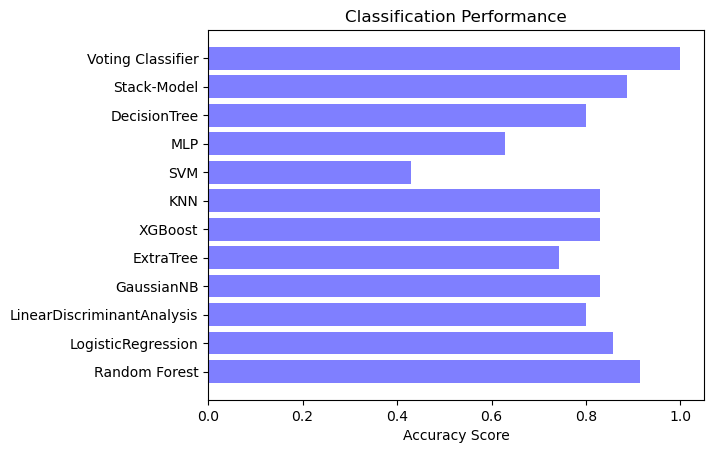

In [79]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

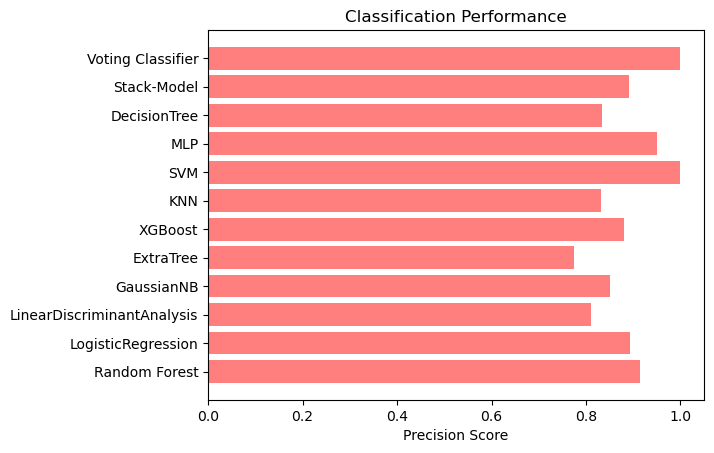

In [80]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

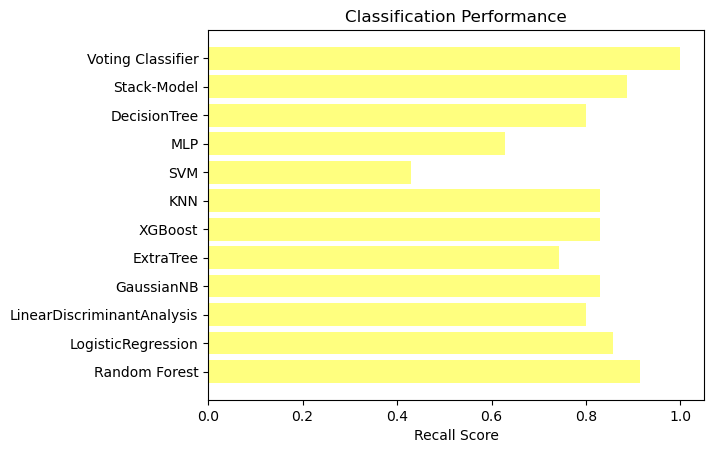

In [81]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 SCore

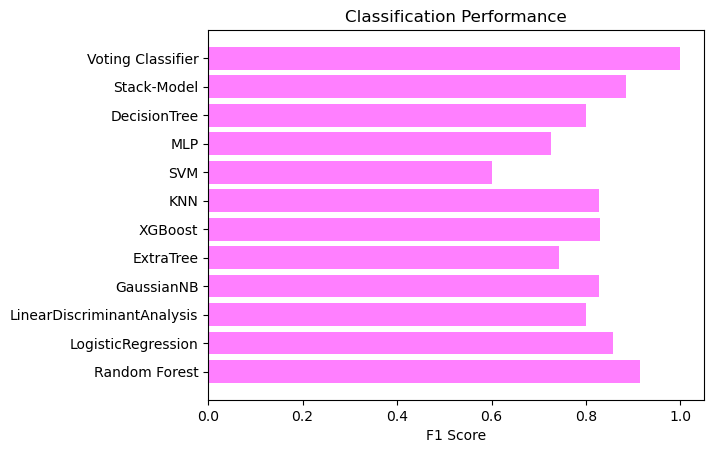

In [82]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='magenta')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()

# AUC Score

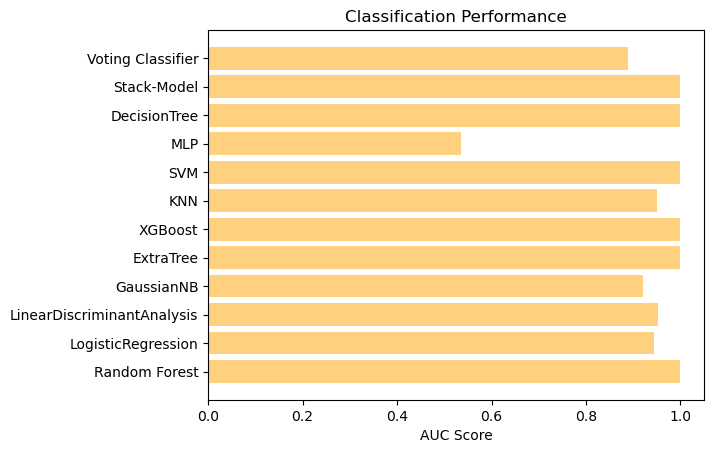

In [83]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, auc, align='center', alpha=0.5,color='orange')
plt2.yticks(y_pos, classifier)
plt2.xlabel('AUC Score')
plt2.title('Classification Performance')
plt2.show()

# Cohen Kappa

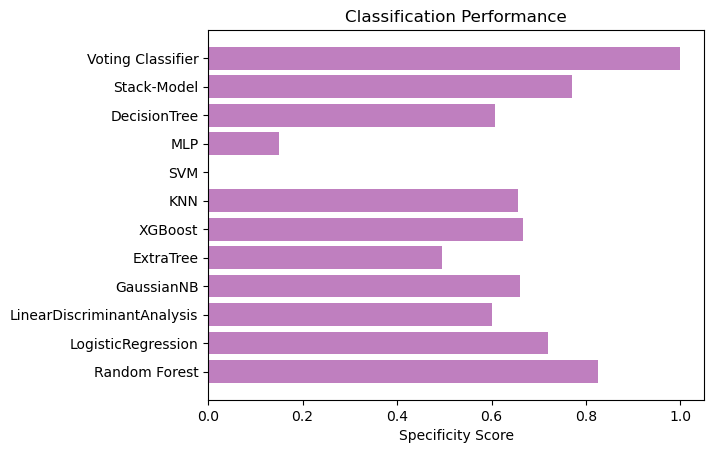

In [84]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, coh, align='center', alpha=0.5,color='purple')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Specificity Score')
plt2.title('Classification Performance')
plt2.show()

# MCC

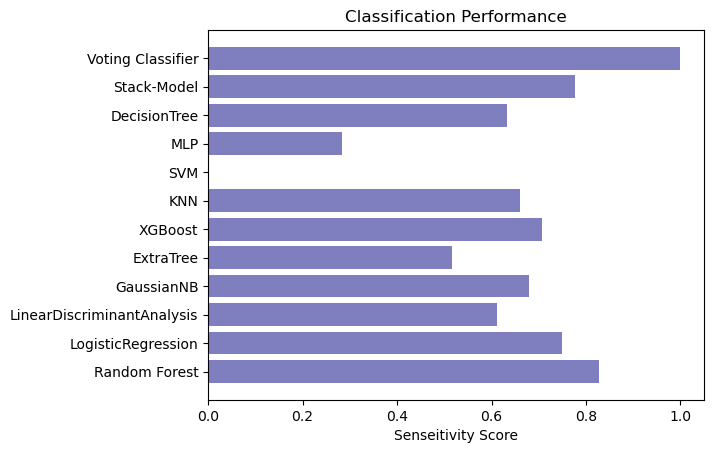

In [85]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, mcc, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Senseitivity Score')
plt2.title('Classification Performance')
plt2.show()

# Modelling

In [86]:
import joblib
filename = 'model_anova.sav'
joblib.dump(model, filename)

['model_anova.sav']